## Access Hydrological Observations

This notebook is used to demonstrate the access and downloading to csv of Hydrological Observations

The notebook was developed using helpful, open access information provided by (MSC GeoMet services)[https://eccc-msc.github.io/open-data/usage/use-case_oafeat/use-case_oafeat-script_en/]

In [1]:
# Import needed modules

from datetime import date
import yaml
import sys

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
from matplotlib import pyplot as plt, dates as mdates
from owslib.ogcapi.features import Features
import numpy as np
import pandas as pd
from tabulate import tabulate
from pathlib import Path
from pprint import pprint

# Import local scripts
sys.path.append('../scripts')
from plotting import *
from scalar_data_access import retrieve_real_time_data, retrieve_historic_data

# Plot in notebook
%matplotlib inline

# add autoreload to automatically reload modules when they change
%load_ext autoreload
%autoreload 2

In [2]:
# Set up logger
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [3]:
# Set variables, this can be replaced by a config file. To be discussed
api_url = "https://api.weather.gc.ca/"

stations_csv = '../gis_data/hydrometric_Bow.csv'
watershed_shp = '../gis_data/Bow_Basins.shp'
flowlines_shp = '../gis_data/Bow_Flowlines.shp'


## Define stations to be imported

Hydrometric station data can be accessed and downloaded.
This is for near real time data as well as historic record.

In this notebook, the stations are read from a provided csv file.
This could be substituted with any list of stations. Station information can also be pulled from the MSC API.

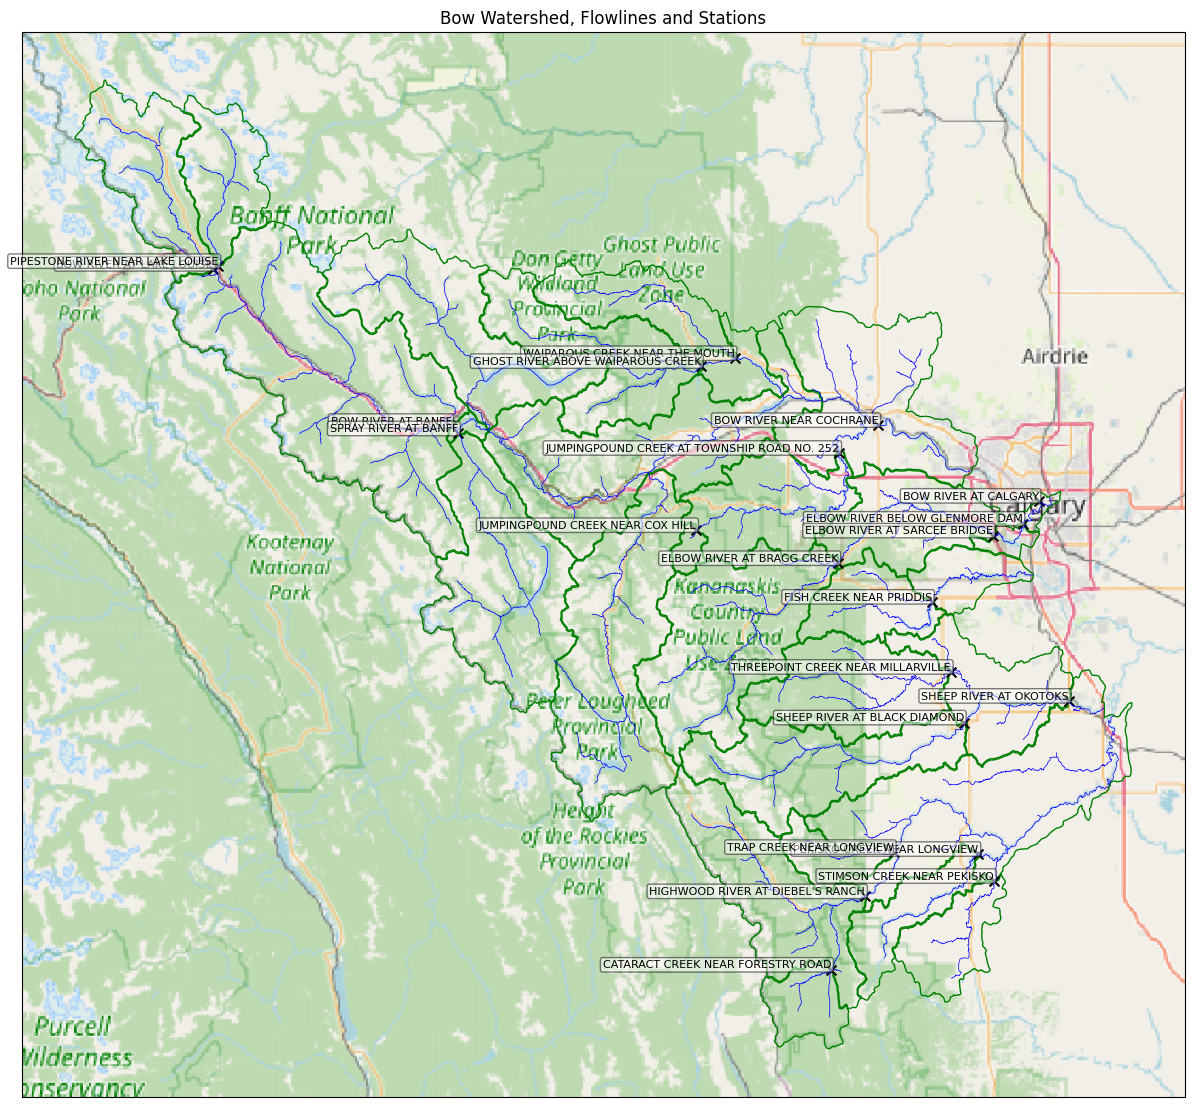

In [4]:

# Read in the list of hydrometric stations
hydro_stations_df = pd.read_csv(stations_csv)
search_stations = hydro_stations_df["ID"].tolist()
# Plot the stations on a map
plot_watershed_flowlines_stations(watershed_shp, flowlines_shp, stations_csv)


In [5]:

output_dir = Path('../output/realtime')
output_dir.mkdir(parents=True, exist_ok=True)
output_suffix = '_realtime'


real_time_end_date = date.today()
real_time_start_date = real_time_end_date - pd.Timedelta(days=30)

retrieve_real_time_data(search_stations, real_time_start_date, real_time_end_date, api_url, output_dir, output_suffix)

INFO:scalar_data_access:Retrieving hydrometric data for the period 2023-12-25/2024-01-24
INFO:scalar_data_access:Data output to ../output/realtime/05BA002_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BB001_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BC001_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BG006_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BG010_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BH004_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BH005_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BH013_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BH015_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BJ001_realtime.csv
INFO:scalar_data_access:Data output to ../output/realtime/05BJ004_realtime.csv
INFO:scalar_data_access:Data output to ../

In [13]:
output_dir = Path('../output/historic')
output_dir.mkdir(parents=True, exist_ok=True)
output_suffix = '_historic'

historic_end_date = date(2023, 12, 31)
historic_start_date = historic_end_date - pd.Timedelta(days=3650)

collection = 'hydrometric-daily-mean'
variables = ['LEVEL', 'DISCHARGE','DISCHARGE_SYMBOL_EN','LEVEL_SYMBOL_EN']

retrieve_historic_data(search_stations, collection, variables, historic_start_date, historic_end_date,  output_dir, output_suffix)

INFO:scalar_data_access:Retrieving hydrometric data for the period 2014-01-02/2023-12-31


['STATION_NUMBER', 'STATION_NAME', 'DATE', 'LEVEL', 'DISCHARGE', 'DISCHARGE_SYMBOL_EN', 'LEVEL_SYMBOL_EN']


INFO:scalar_data_access:Data output to ../output/historic/05BA002_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BB001_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BC001_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BG006_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BG010_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BH004_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BH005_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BH013_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BH015_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BJ001_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BJ004_historic.csv
INFO:scalar_data_access:Data output to ../output/historic/05BJ010_historic.csv
INFO:scalar_data_access:Data output to ../output/his

In [11]:
collection = 'hydrometric-annual-statistics'

output_dir = Path(f'../output/{collection}')
output_dir.mkdir(parents=True, exist_ok=True)
output_suffix = f'_{collection}'

collection = 'hydrometric-annual-statistics'
variables = ['MAX_DATE','MIN_DATE','MAX_VALUE','MIN_VALUE','MAX_SYMBOL_EN','MIN_SYMBOL_EN']

retrieve_historic_data(search_stations, collection, variables, historic_start_date, historic_end_date,  output_dir, output_suffix)


INFO:scalar_data_access:Retrieving hydrometric data for the period 2014-01-02/2023-12-31
INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BA002hydrometric-annual-statistics.csv


['STATION_NUMBER', 'STATION_NAME', 'DATE', 'MAX_DATE', 'MIN_DATE', 'MAX_VALUE', 'MIN_VALUE', 'MAX_SYMBOL_EN', 'MIN_SYMBOL_EN']


INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BB001hydrometric-annual-statistics.csv
INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BC001hydrometric-annual-statistics.csv
INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BG006hydrometric-annual-statistics.csv
INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BG010hydrometric-annual-statistics.csv
INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BH004hydrometric-annual-statistics.csv
INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BH005hydrometric-annual-statistics.csv
INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BH013hydrometric-annual-statistics.csv
INFO:scalar_data_access:Data output to ../output/hydrometric-annual-statistics/05BH015hydrometric-annual-statistics.csv
INFO:scalar_data_access:Data output to .

NameError: name 'hydrometric_data' is not defined

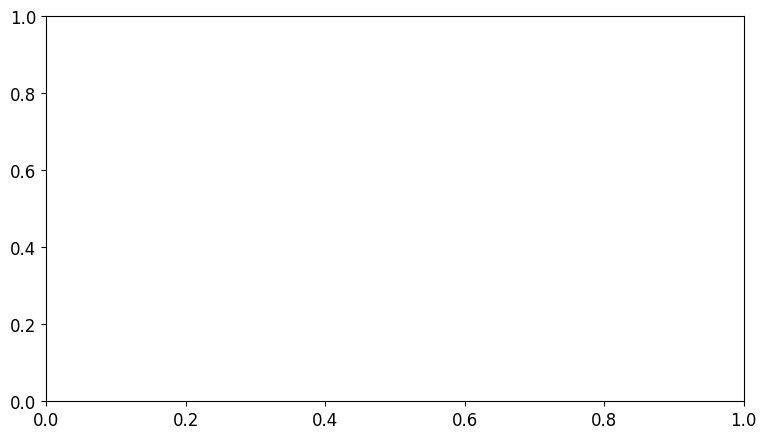

In [10]:
# Creation of an interactive plot with Matplotlib

# Hydrometric station to display on the plot
station_displayed_p = search_stations[1]

# Function to create a plot for the chosen hydrometric station
def interactive_plot(station):
    # Adjusting font and figure size
    params = {
        "legend.fontsize": "14",
        "figure.figsize": (9, 5),
        "axes.labelsize": "14",
        "axes.titlesize": "16",
        "xtick.labelsize": "12",
        "ytick.labelsize": "12",
    }
    plt.rcParams.update(params)
    
    # Creation of the plot
    fig, ax = plt.subplots()
    line, = plt.plot(
        hydrometric_data[station].index,
        hydrometric_data[station]["LEVEL"],
        marker="o",
        label="Daily mean",
    )
    plt.legend()
    plt.grid(True, which="both")
    ax.set_title(
        fill(
            "Water levels at station {} ({})".format(
                hydrometric_data[station]["STATION_NAME"].iloc[0], station
            ), 60
        )
    )
    ax.set_ylabel("Water level (m)")
    ax.set_xlabel("Date")

    # Modification of the x axis ticks and tick labels
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    # Creation of the annotations to display on hover
    annot = ax.annotate(
        "",
        xy=(0, 0),
        xytext=(-60, -40),
        textcoords="offset points",
        bbox=dict(boxstyle="round", fc="w"),
        arrowprops=dict(arrowstyle="->"),
    )
    annot.set_visible(False)

    return line, annot, ax, fig


# Choosing the hydrometric stations to create the plot
line, annot, ax, fig = interactive_plot(station_displayed_p)


# Updating the annotation with the data point information
def update_annot(ind):
    # Identifying the annotation to display
    x, y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    
    # Adding text to the annotation (date and water level)
    date_x = x[ind["ind"]][0]
    level_y = round(y[ind["ind"]][0], 2)
    text = "{}\nDaily mean: {} m".format(date_x, level_y)
    annot.set_text(text)
    
    # Setting annotation transparency
    annot.get_bbox_patch().set_alpha(0.8)


# Display of annotations on hover
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()


# Adding the feature that displays annotations on hover               
fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

/var/folders/cf/h3xm_pj57nxdnm6lk83rzxt9jt0gpj/T/ipykernel_14987/498741574.py:47: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(
/var/folders/cf/h3xm_pj57nxdnm6lk83rzxt9jt0gpj/T/ipykernel_14987/498741574.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(


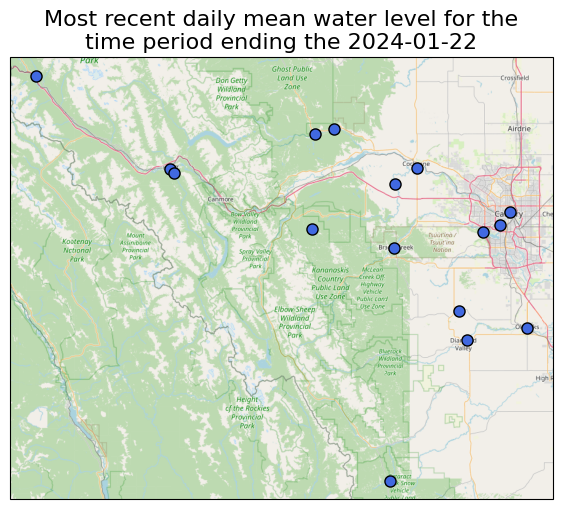

In [ ]:
# Creation of the interactive map

# Lists of positions and labels
labels = []
all_lat = []
all_lon = []
for station in stations:
    latest_data = hydrometric_data[station].iloc[-1]
    labels.append(
        f"{hydrometric_data[station]['STATION_NAME'].iloc[0]}\n"
        + f"Station ID: {latest_data.STATION_NUMBER}\n"
        + f"Date: {latest_data.name}\n"
        + f"Water level: {round(latest_data.LEVEL, 2)} m"
    )
    all_lat.append(latest_data.LATITUDE)
    all_lon.append(latest_data.LONGITUDE)

# List for keeping track of all annotations
annotations = [None for label in labels]

# Defining size of markers
markersize = 8
markersize_inches = markersize / 72.0

# Setting up figure
tiler = OSM()
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=tiler.crs)
ax.set_title(fill(
    "Most recent daily mean water level for the "
    + f"time period ending the {end_date}", 45))

# Setting the extent to see adequately all data points
ax.set_extent(
    [
        min(all_lon) * 1.001,
        max(all_lon) * 0.999,
        min(all_lat) * 0.999,
        max(all_lat) * 1.001,
    ]
)

# Adding a basemap from Open Street Map
ax.add_image(tiler, 9)

# Adding data points
ax.plot(
    all_lon,
    all_lat,
    "bo",
    marker="o",
    mec="k",
    color="RoyalBlue",
    ms=markersize,
    transform=ccrs.Geodetic(),
)

# Figure coordinates in inches
trans = ax.transData + fig.dpi_scale_trans.inverted()


# Function for checking mouse coordinates and annotating
def on_move(event):
    if event.inaxes:
        # Transforming the coordinates in the same projection as the plot
        xproj, yproj = zip(
            *[
                ax.projection.transform_point(x, y, src_crs=ccrs.Geodetic())
                for x, y in zip(all_lon, all_lat)
            ]
        )
        # Event coordinates in inches
        x0, y0 = trans.transform((event.xdata, event.ydata))
        # Data points coordinates in inches
        xfig, yfig = zip(
            *[trans.transform((x, y)) for x, y in zip(xproj, yproj)]
        )
        # Distance of the mouse from the data point
        dists = [math.sqrt((x - x0) ** 2 + (y - y0) ** 2) for x, y in zip(
            xfig, yfig
        )]
        
        # Displaying annotations on hover
        for n, (x, y, dist, label) in enumerate(
                zip(xproj, yproj, dists, labels)
        ):
            if dist < markersize_inches and annotations[n] is None:
                annotations[n] = ax.annotate(
                    label,
                    [x, y],
                    xycoords="data",
                    xytext=(10, 10),
                    textcoords="offset points",
                    ha="center",
                    va="bottom",
                    bbox=dict(
                        facecolor="white",
                        edgecolor="black",
                        boxstyle="round"
                    ),
                    zorder=10,
                )
                fig.canvas.draw()

            elif dist > markersize_inches and annotations[n] is not None:
                annotations[n].remove()
                annotations[n] = None
                fig.canvas.draw()


# Connecting the event handler
cid = fig.canvas.mpl_connect("motion_notify_event", on_move)

plt.show()